In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import sys

In [2]:
# Cargar el archivo .mat
data = loadmat('../../datos/dataicann.mat')

# Mostrar las claves del diccionario cargado
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'z', 'nom', 'NombresVariables'])

In [3]:
muestras = data['z']
etiquetas = data['nom']
nombresCaracteristicas = data['NombresVariables']

# Concatenar todas las muestras en una matriz bidimensional
X = np.vstack([np.vstack(muestra) for muestra in muestras[0]])

# Crear un vector de etiquetas con el mismo número de filas que muestras_concatenadas
etiq_str = np.array([str(etiquetas[0][k][0]) for k in range(etiquetas.shape[1])])
etiq_str = np.array([etiqueta.split('.')[0] for etiqueta in etiq_str])
Y = np.repeat(etiq_str, [muestra.shape[0] for muestra in muestras[0]])

print(f"La matriz de datos de diagnóstico del motor tiene {X.shape[0]} muestras y {X.shape[1]} características")
print(f"El vector de etiquetas tiene {Y.shape[0]} elementos")

La matriz de datos de diagnóstico del motor tiene 209920 muestras y 5 características
El vector de etiquetas tiene 209920 elementos


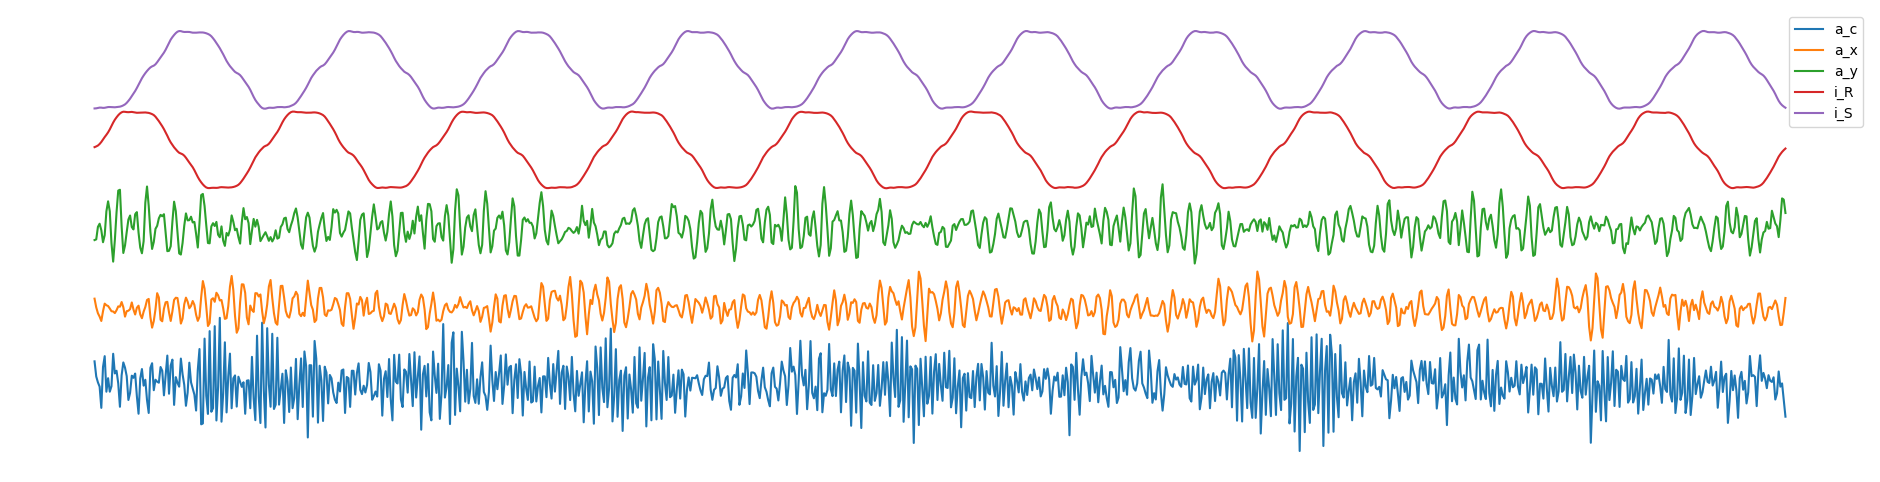

In [4]:
# Seleccionar una ventana de la matriz de datos
ventana = X[:1000, :]

# Crear la figura y los ejes con un tamaño más alargado
fig, ax = plt.subplots(figsize=(24, 6))

# Graficar las señales con un offset
offset = 1.5
for i in range(ventana.shape[1]):
    ax.plot(ventana[:, i] + i * offset, label=f'{str(nombresCaracteristicas[0][i][0])}')

# Configurar el fondo blanco
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Eliminar el grid y los ticks
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Eliminar el borde cuadrado
for spine in ax.spines.values():
    spine.set_visible(False)

# Añadir la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()

/var/folders/qq/59l8jfj10bb6776hrk9cypv80000gn/T/ipykernel_66200/1330395560.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


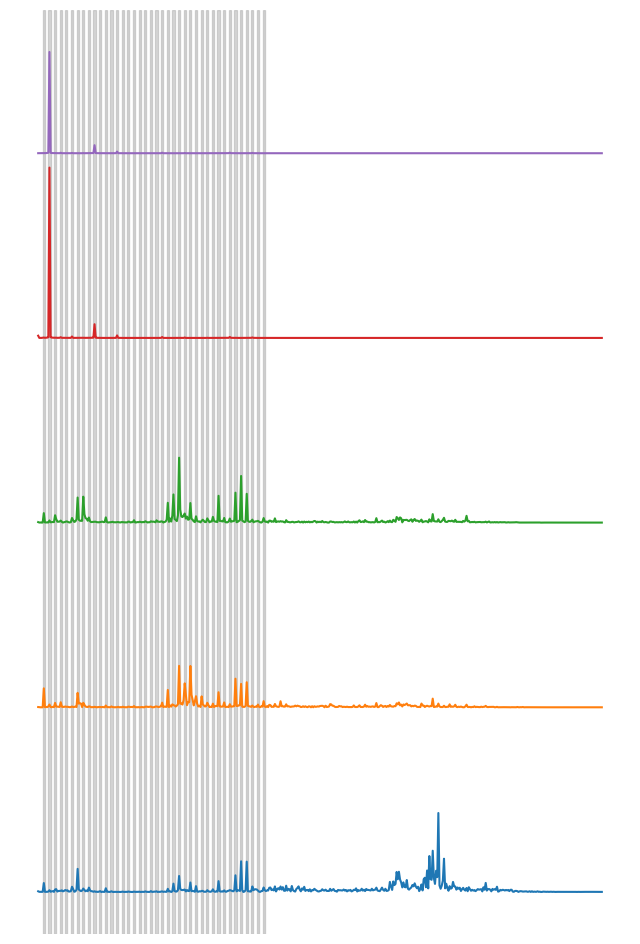

In [5]:
scaler = StandardScaler()
Xn = scaler.fit_transform(X)

V = Xn[:1000, :]

fm = 5000 # Frecuencia de muestreo
tm = 1/fm # Tiempo de muestreo
Q = X.shape[0] # Número de muestras
ff = np.arange(0, Q, 1) * (fm/Q) # Vector de frecuencias

# Parámetros constructivos de las ventanas
N = 1000 # Tamaño de la ventana
delta = 400 # Desplazamiento de la ventana
bandasFreq = np.arange(25, 1025, 25) # Bandas de frecuencia

f = np.arange(0, N, 1) * (fm/N) # Vector de frecuencias

# Calcular la FFT para cada columna de la matriz V
fft_V = np.fft.fft(V, axis=0)

# Obtener la magnitud de la FFT
fft_magnitude = np.abs(fft_V)

# Graficar la magnitud de la FFT para cada columna con offset
fig, ax = plt.subplots(figsize=(8, 12))
offset = 1000
for i in range(fft_magnitude.shape[1]):
    ax.plot(f[f <= 2500], fft_magnitude[f <= 2500, i] + i * offset)

# Añadir zonas sombreadas para las bandas de frecuencia
for banda in bandasFreq:
    ax.axvspan(banda - 5, banda + 5, color='gray', alpha=0.3)

# Configurar el fondo blanco
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Eliminar el grid, los ticks, las etiquetas, las leyendas y el título
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
ax.legend().set_visible(False)

# Eliminar el borde cuadrado
for spine in ax.spines.values():
    spine.set_visible(False)

# Mostrar la gráfica
plt.show()

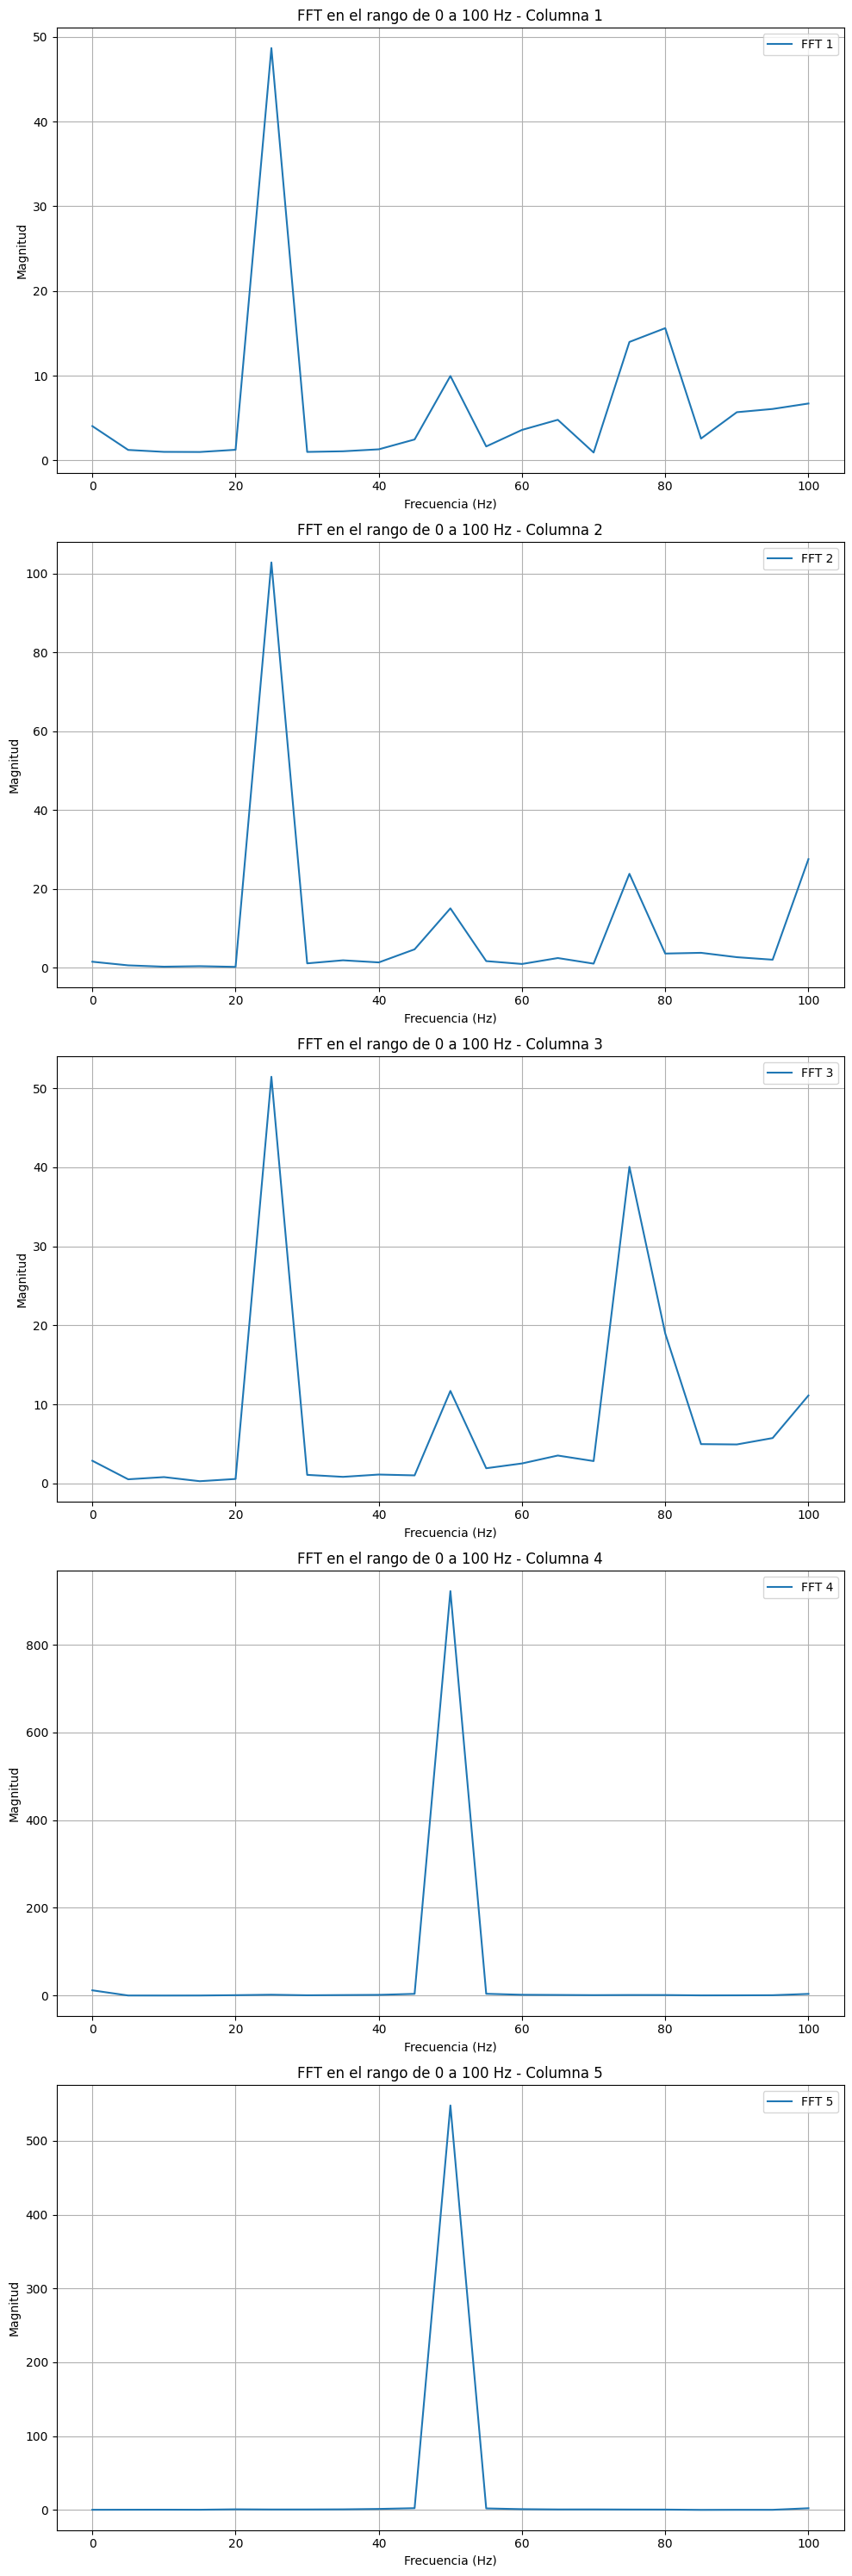

In [6]:
# Crear la figura y los ejes del subplot
fig, axs = plt.subplots(fft_magnitude.shape[1], 1, figsize=(10, 6 * fft_magnitude.shape[1]))

# Graficar la magnitud de la FFT para cada columna en el rango de 0 a 100 Hz
for i in range(fft_magnitude.shape[1]):
    axs[i].plot(f[f <= 100], fft_magnitude[f <= 100, i], label=f'FFT {i+1}')
    axs[i].set_facecolor('white')
    axs[i].grid(True)
    axs[i].set_xlabel('Frecuencia (Hz)')
    axs[i].set_ylabel('Magnitud')
    axs[i].set_title(f'FFT en el rango de 0 a 100 Hz - Columna {i+1}')
    axs[i].legend()

# Configurar el fondo blanco de la figura
fig.patch.set_facecolor('white')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [7]:
sys.path.append('../../utils')
from getData import get_data

F, Fx, Fy = get_data("../../datos/dataicann.mat")

In [16]:
# Filtrar las filas correspondientes a la etiqueta 'asim0g'
indices_asim0g = [i for i, label in enumerate(Fx) if label == 'asim0g']
indices_asim0g = indices_asim0g[:len(indices_asim0g)//2]
F_asim0g = F[indices_asim0g, :5]

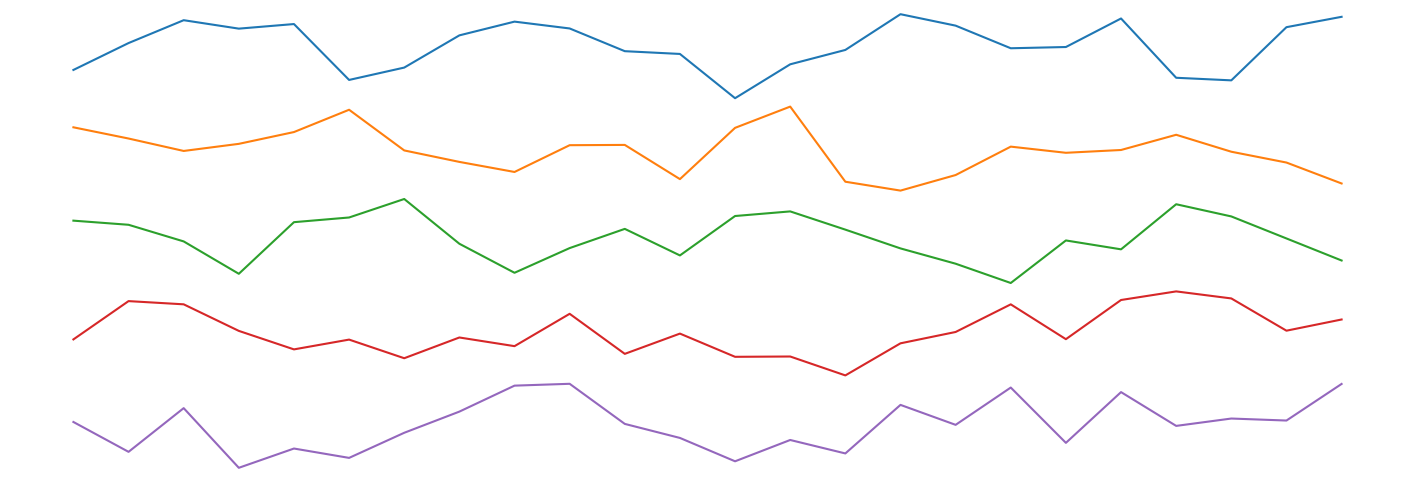

In [22]:
# Crear la figura y los ejes del subplot
fig, axs = plt.subplots(F_asim0g.shape[1], 1, figsize=(18, 6), sharex=True)

# Graficar las señales con un offset
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i in range(F_asim0g.shape[1]):
    axs[i].plot(F_asim0g[:, i], label=f'Señal {i+1}', color=colors[i % len(colors)])
    axs[i].set_facecolor('white')
    axs[i].grid(False)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_title('')
    axs[i].legend().set_visible(False)
    for spine in axs[i].spines.values():
        spine.set_visible(False)

# Configurar el fondo blanco de la figura
fig.patch.set_facecolor('white')

# Ajustar el espaciado entre subplots
plt.subplots_adjust(hspace=0)

# Mostrar la gráfica
plt.show()


In [14]:
print(Fy[:5])

['a_c@25Hz', 'a_x@25Hz', 'a_y@25Hz', 'i_R@25Hz', 'i_S@25Hz']
